### Discussion Related With Outliers nd Impact On Machine Learning! 

#### Which ML models Are Sensitive To Outliers



In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
Data = pd.read_csv('Titanic-Dataset.csv')
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
Data['Age'].isnull().sum()

177

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_26847/4077940811.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['Age'].dropna())


<Axes: xlabel='Age', ylabel='Density'>

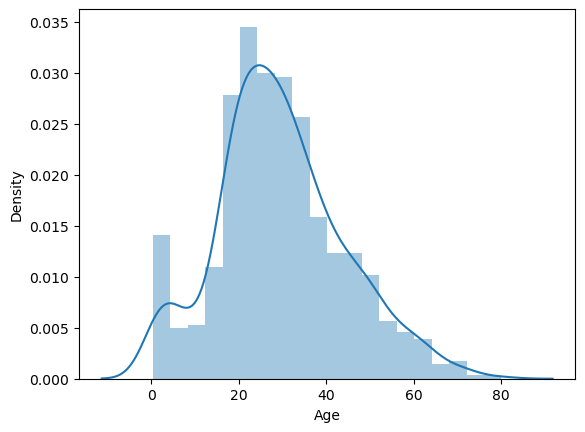

In [8]:
sns.distplot(Data['Age'].dropna())

/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_26847/2614186172.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['Age'].fillna(100), color='g')


<Axes: xlabel='Age', ylabel='Density'>

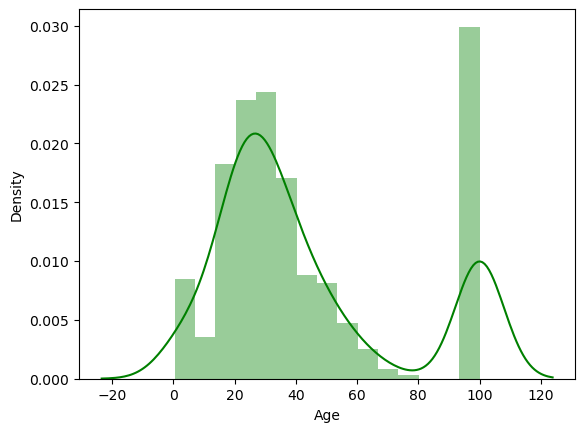

In [12]:
sns.distplot(Data['Age'].fillna(100), color='g')

#### Guassion Distribution


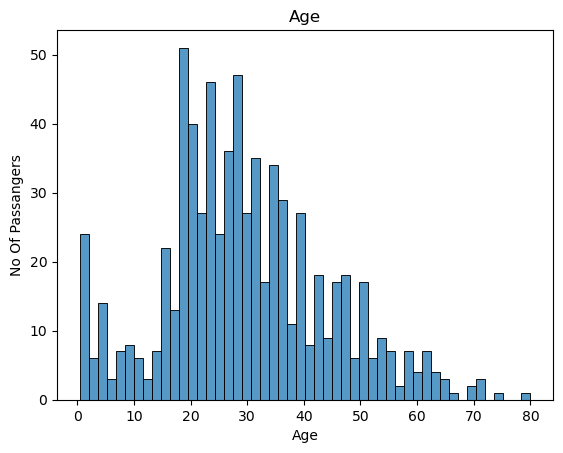

In [70]:
sns.histplot(Data['Age'], bins= 50)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('No Of Passangers')
plt.show()

<Axes: ylabel='Age'>

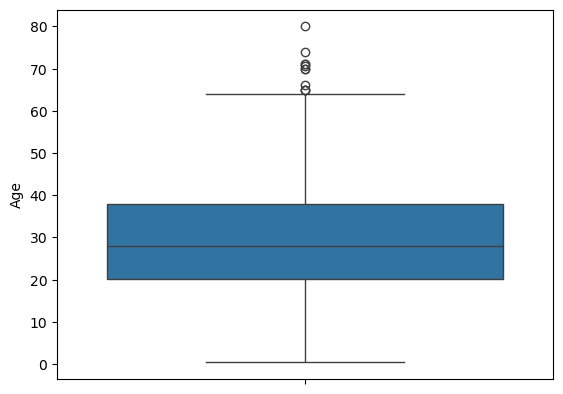

In [17]:
sns.boxplot(Data['Age'])

In [23]:
Data['Age'].describe().T

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [31]:
### Assuming The Age follows A guassion distribution We will calculate the boundryes hich diffeetiate the outliers 

upper_boundry = Data['Age'].mean() + 3 * Data['Age'].std()
lower_boundry = Data['Age'].mean() - 3 * Data['Age'].std()
print(upper_boundry)
print(lower_boundry)
print(Data['Age'].mean())

73.27860964406095
-13.88037434994331
29.69911764705882


In [34]:
#### Let's Campute the Tnterquartile Range to calculate the boundries

IQR = Data['Age'].quantile(0.75) - Data['Age'].quantile(0.25)
IQR

17.875

In [38]:
lower_bridge = Data['Age'].quantile(0.25) - (1.5 * IQR)
upper_bridge = Data['Age'].quantile(0.75) + (1.5 * IQR)
print(lower_bridge)
print(upper_bridge)

-6.6875
64.8125


In [39]:
#### Extreme OutLiers

lower_bridge = Data['Age'].quantile(0.25) - (3 * IQR)
upper_bridge = Data['Age'].quantile(0.75) + (3 * IQR)
print(lower_bridge)
print(upper_bridge)

-33.5
91.625


### Feature is squeid

Text(0, 0.5, 'No Of Passangers')

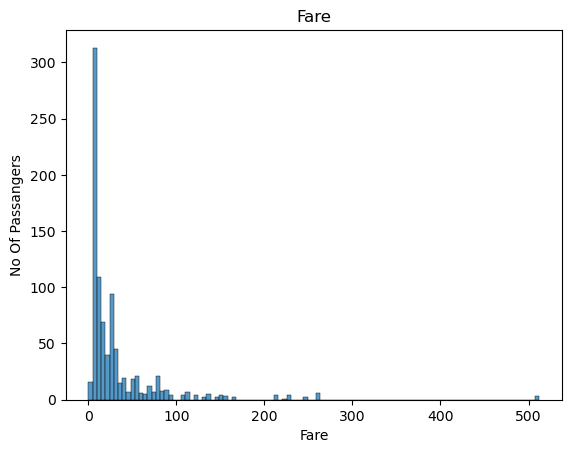

In [40]:
sns.histplot(Data['Fare'])
plt.title('Fare')
plt.xlabel('Fare')
plt.ylabel('No Of Passangers')

<Axes: ylabel='Fare'>

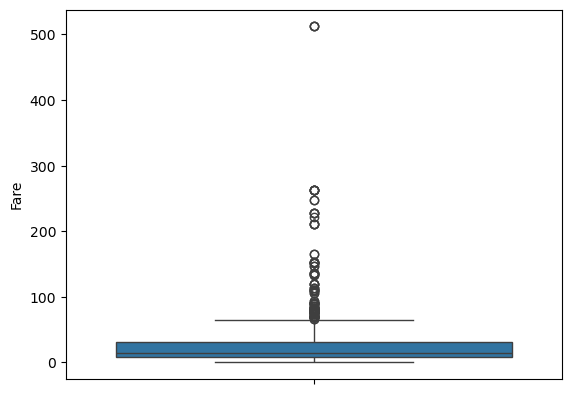

In [41]:
sns.boxplot(Data['Fare'])



In [43]:
Data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [44]:
#### Let's Campute the Tnterquartile Range to calculate the boundries

IQR = Data['Fare'].quantile(0.75) - Data['Fare'].quantile(0.25)
IQR

23.0896

In [45]:
lower_bridge = Data['Fare'].quantile(0.25) - (1.5 * IQR)
upper_bridge = Data['Fare'].quantile(0.75) + (1.5 * IQR)
print(lower_bridge)
print(upper_bridge)

-26.724
65.6344


In [46]:
#### Extreme OutLiers

lower_bridge = Data['Fare'].quantile(0.25) - (3 * IQR)
upper_bridge = Data['Fare'].quantile(0.75) + (3 * IQR)
print(lower_bridge)
print(upper_bridge)

-61.358399999999996
100.2688


In [47]:
data = Data.copy()

In [48]:
data.loc[data['Age'] > 73, 'Age'] = 73

In [49]:
data.loc[data['Fare'] > 100, 'Fare'] = 100

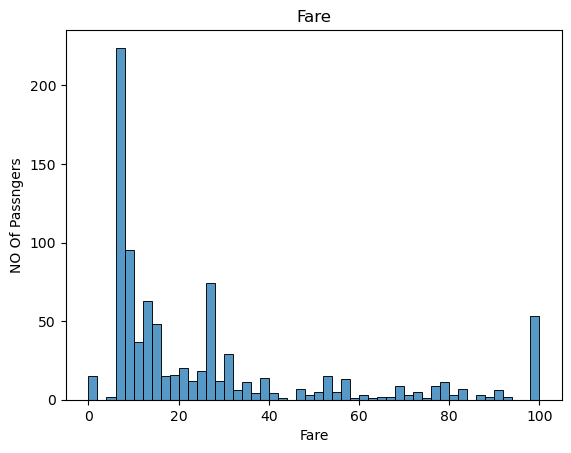

In [50]:
sns.histplot(data['Fare'], bins= 50)
plt.title('Fare')
plt.xlabel('Fare')
plt.ylabel('NO Of Passngers')
plt.show()

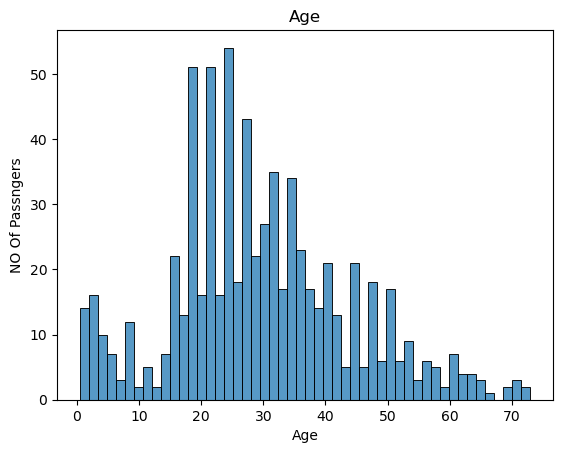

In [51]:
sns.histplot(data['Age'], bins= 50)
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('NO Of Passngers')
plt.show()

In [52]:
import scipy.stats as stat 
import pylab

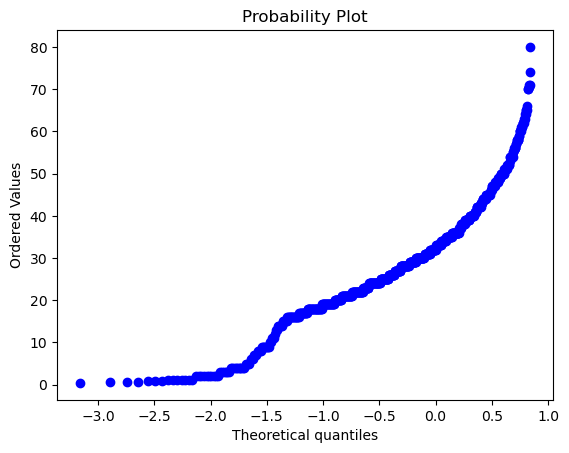

In [67]:
stat.probplot(Data['Age'], dist= 'norm', plot=pylab)
plt.show()

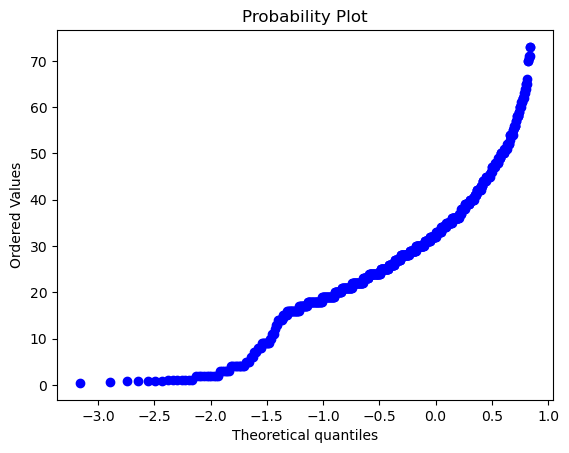

In [68]:
stat.probplot(data['Age'], dist= 'norm', plot=pylab)
plt.show()

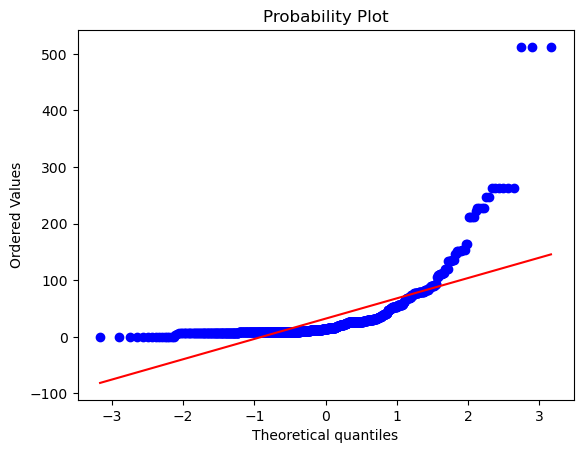

In [59]:
stat.probplot(Data['Fare'], dist= 'norm', plot=pylab)
plt.show()

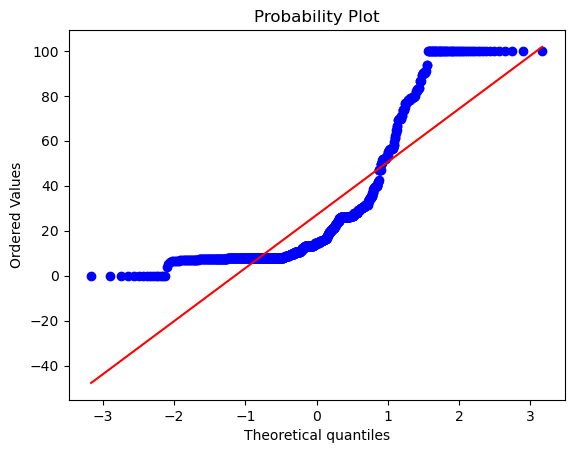

In [56]:
stat.probplot(data['Fare'], dist= 'norm', plot=pylab)
plt.show()